In [28]:
from __future__ import print_function
import astropy
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#sys.path.pop(0)
%matplotlib inline

# First, lets make sure that barycorrpy is working

In [29]:
import barycorrpy
barycorrpy.__version__ #This tutorial assumes v0.4.4

'0.4.4'

In [30]:
# Running sample script - this should print:
# """
# ***********SUCCESS**************
# All barycentric correction velocities,  and time stamp conversions match expected values.
# """
from barycorrpy import sample_script 
results = sample_script.run_sample() 

Please join our Google Group to keep abreast of the latest versions and bug fixes - https://groups.google.com/g/barycorrpy
***********SUCCESS**************
All barycentric correction velocities,  and time stamp conversions match expected values.


# Import our package

In [31]:
import neidspec
neidspec

<module 'neidspec' from '/home/tehan/PycharmProjects/neidspec/neidspec/__init__.py'>

In [32]:
from astropy.io import fits
hdul = fits.open("/home/tehan/Documents/NeidSpecMatch/FITS/neidL2_20211030T052756.fits")
hdul[7].data[:, 0]

array([           nan,            nan,     0.        ,  3570.94356078,
        3591.9432278 ,  3613.47972574,  3635.09940399,  3656.83223341,
        3679.15722607,  3701.75985884,  3724.37134795,  3747.35856868,
        3770.5767492 ,  3794.19315142,  3818.06630489,  3842.2328644 ,
        3866.70899957,  3891.48648582,  3916.59837977,  3942.01698308,
        3967.80084816,  3993.90540051,  4020.36598242,  4047.16152465,
        4074.34981603,  4101.87137832,  4129.7697227 ,  4158.06165382,
        4186.73898167,  4215.83218691,  4245.29669819,  4275.21179258,
        4305.52240858,  4336.29111108,  4367.49410008,  4399.13927206,
        4431.26123685,  4463.84487549,  4496.91964539,  4530.48107593,
        4564.55082084,  4599.12536714,  4634.24622706,  4669.89765919,
        4706.10615366,  4742.87668837,  4780.22434378,  4818.16941014,
        4856.72191911,  4895.88951231,  4935.69817588,  4976.16647039,
        5017.30072819,  5059.10971601,  5101.63422473,  5144.82889715,
      

In [33]:
# Lets read in an HPF spectrum
# The function reads in the object name from the header
# If ccf_redshift is true, then it will redshift the wavelength to the stellar frame
# i.e., this takes out the absolute redshift estimated by calculating a CCF
N = neidspec.NEIDSpectrum("/home/tehan/Documents/NeidSpecMatch/FITS/neidL2_20211030T052756.fits",ccf_redshift=True)

In [34]:
# Barycentric julian date of the observation
N.bjd

2459517.742432951

In [35]:
print(N) # The SNR is for HPF order 18 (~1micron)

NEIDSpec(TIC 239332587,sn55=23.2)


### This creates a 'Target' class instance within our object

- The config file for the object is by default saved to "../data/target_files/"
- If that file already exist, then it is read in from disk. If it does not exist, it queries Simbad and creates the file
- This way you can change the values within the file if it is already created

In [36]:
# This is used 
N.target

TIC 239332587, ra=311.2671, dec=44.4991, pmra=434.079, pmdec=271.143, rv=0.0000, px=82.9968, epoch=2451545.0

In [37]:
N.target.ra, N.target.dec

(311.267079900858, 44.4990676080927)

In [38]:
# We can use this to calculate the barycentric velocity in km/s
t = astropy.time.Time("2019-10-08 00:00:00.0",format="iso").jd
N.target.calc_barycentric_velocity(t,obs='McDonald Observatory')

(2458764.5031153867, -9.6108693224807)

In [39]:
# The barycentric velocity is automatically stored in an attribute
N.berv # km/s

-13.935384991883819

In [40]:
np.shape(N.f_debl)

(94, 9216)

## Lets plot the spectrum 

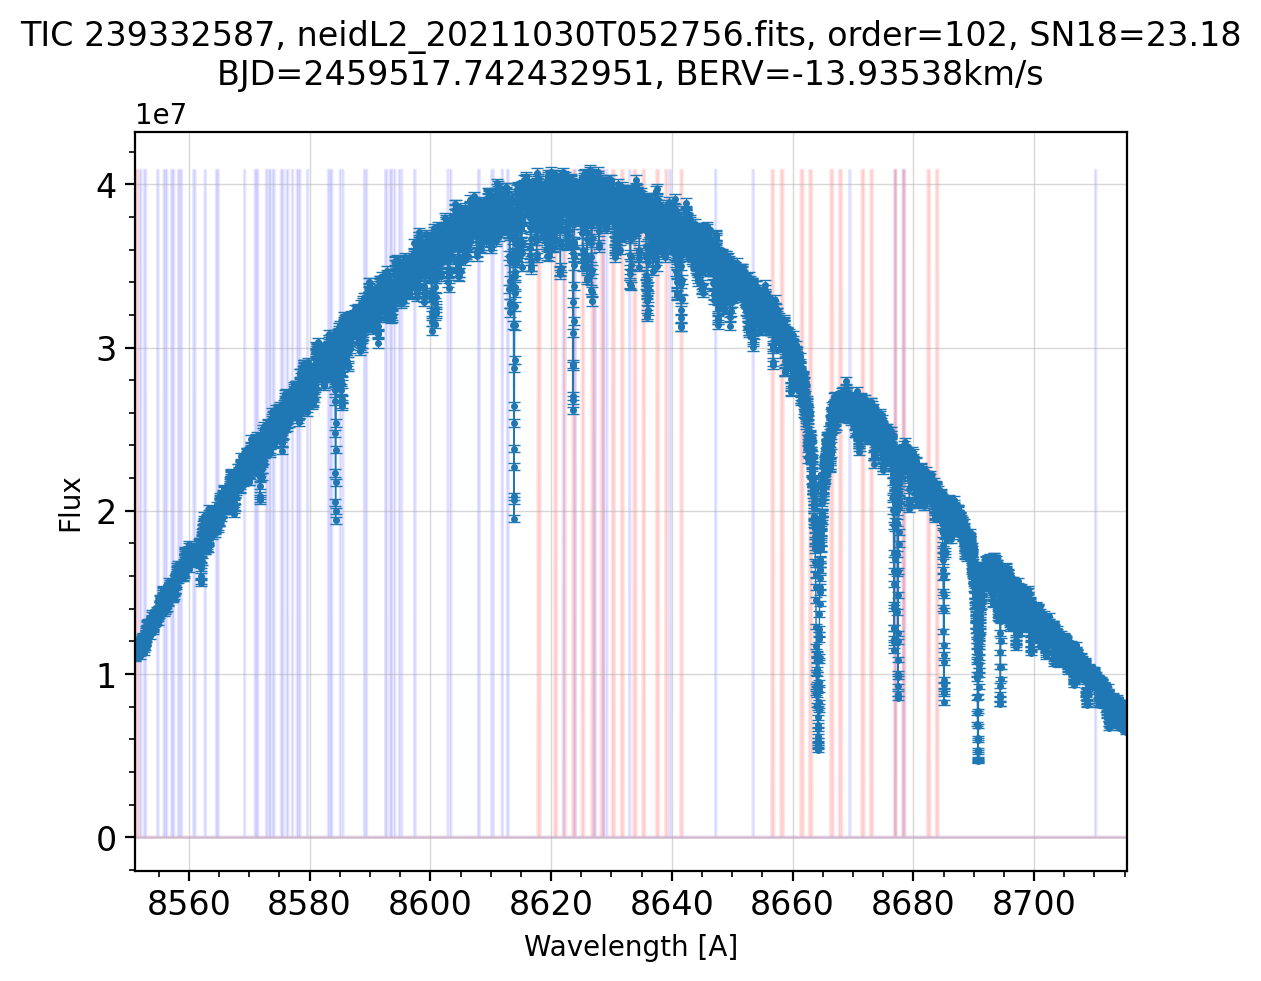

In [41]:
N.plot_order(102,deblazed=False)

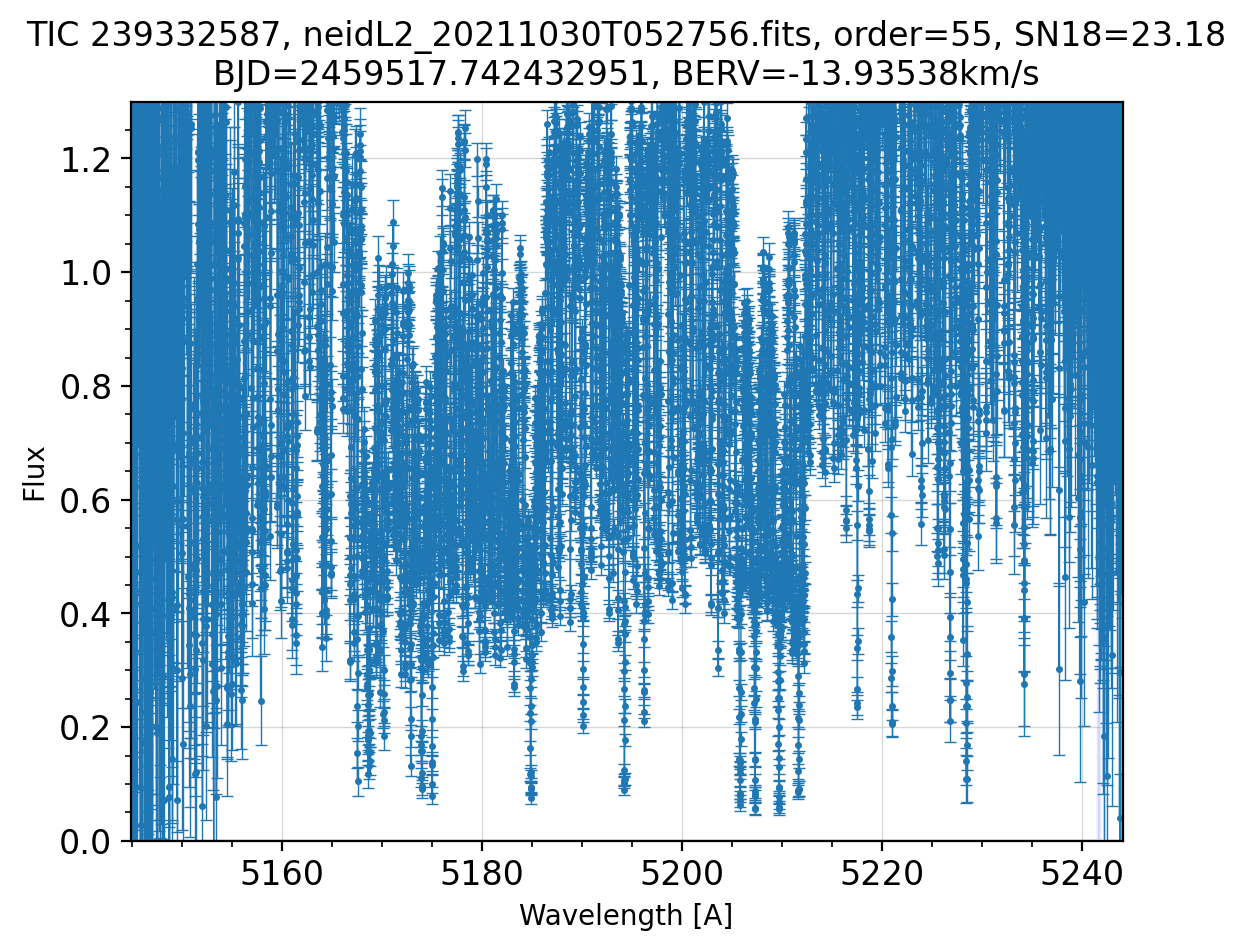

In [62]:
N.plot_order(55,deblazed=True)

/home/tehan/PycharmProjects/neidspec/neidspec/neidspec.py:288: RuntimeWarning: divide by zero encountered in divide
  self.f_sky_debl = self.hdu[2].data[s:e] * self.exptime / hdu[2].data[s:e]
/home/tehan/PycharmProjects/neidspec/neidspec/neidspec.py:288: RuntimeWarning: invalid value encountered in divide
  self.f_sky_debl = self.hdu[2].data[s:e] * self.exptime / hdu[2].data[s:e]
/home/tehan/PycharmProjects/neidspec/neidspec/neidspec.py:293: RuntimeWarning: invalid value encountered in divide
  self.f_debl[i] = self.f_debl[i] / np.nanmedian(self.f_debl[i])


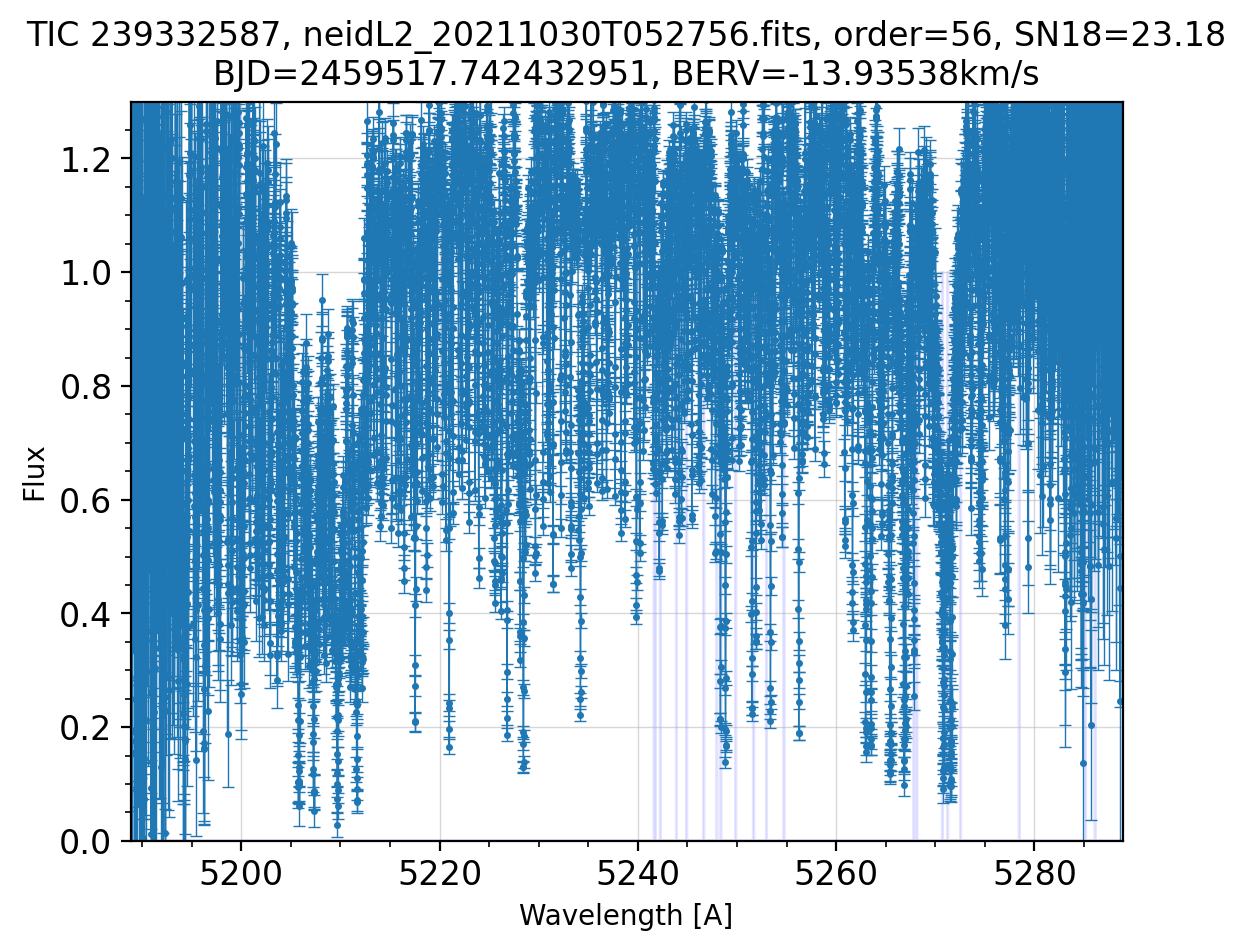

In [59]:
N.plot_order(56,deblazed=True)

Text(0.5, 1.0, 'Deblazed spectrum shifted to stellar restframe\n(corrected for barycentric and absolute RV motion)')

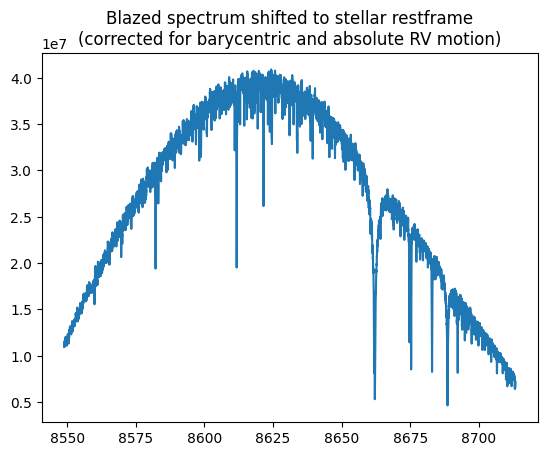

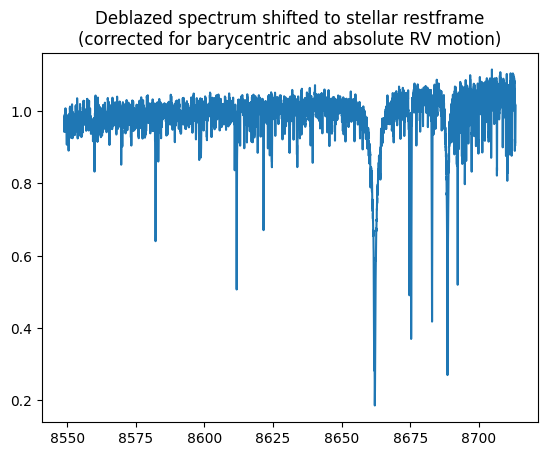

In [44]:
#We could also this the following way using the handy wavelength and flux attributes
o = 102
o -= 10

# Blazed
fig, ax = plt.subplots()
ax.plot(N.w_shifted[o],N.f[o])
ax.set_title("Blazed spectrum shifted to stellar restframe\n(corrected for barycentric and absolute RV motion)")

# Deblazed
fig, ax = plt.subplots()
ax.plot(N.w_shifted[o],N.f_debl[o])
ax.set_title("Deblazed spectrum shifted to stellar restframe\n(corrected for barycentric and absolute RV motion)")


In [45]:
# Other attributes are:
print(N.w_shifted.shape) # shifted wavelength
print(N.w.shape)         # non-shifted original wavelength
print(N.f.shape)         # non-deblazed science flux (sky-subtracted)
print(N.f_debl.shape)    # deblazed science flux (sky-subtracted)
print(N.f_sci.shape)     # Science flux (not sky-subtracted)
print(N.e.shape)         # error for deblazed sky-subtracted science flux
print(N.object)          # Object
print(N.bjd)             # BJD_TDB midpoint
print(N.sn55)            # SNR for order 55
print(N.berv)            # barycentric correction in km/s

(94, 9216)
(94, 9216)
(94, 9216)
(94, 9216)
(94, 9216)
(94, 9216)
TIC 239332587
2459517.742432951
23.18409080001529
-13.935384991883819


# CCFs

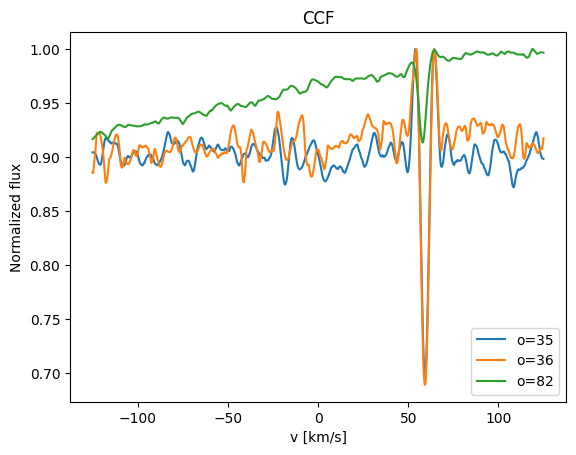

In [58]:
# Lets calculate fast ccfs for well-behaved orders using the crosscorr package
v = np.linspace(-125.,125.,1501)
orders = [45,46,92]
ccf = N.calculate_ccf_for_orders(v,orders=orders,plot=True)

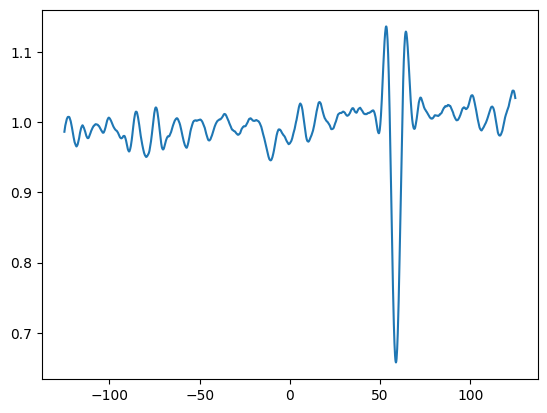

In [47]:
fig, ax = plt.subplots()
o = 55
ax.plot(v,ccf[o - 10]/np.nanmedian(ccf[o - 10]))

unexpected array size: new_size=1, got array with arr_size=0


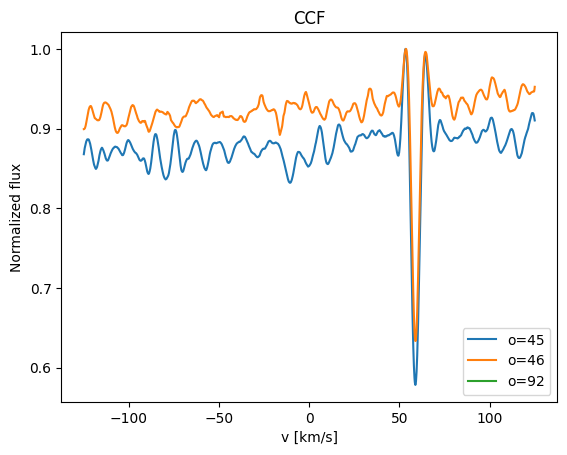

In [48]:
# Lets calculate fast ccfs for well-behaved orders using the crosscorr package
v = np.linspace(-125., 125., 1501)
orders = [55, 56, 102]
ccf = N.calculate_ccf_for_orders(v, orders=orders, plot=True)# Calculates on barycentric shifted (not abs RV shifted) and undeblazed version
# rv1 is just the argmin of the CCF, the rv2 is an actual Gaussian fit minimum to the CCF valley
# You can see that order 18 is pretty wonky -- likely tellurics
# orders = [55,56]
# rv1, rv2 = N.rvabs_for_orders(v,orders,plot=True,verbose=True)

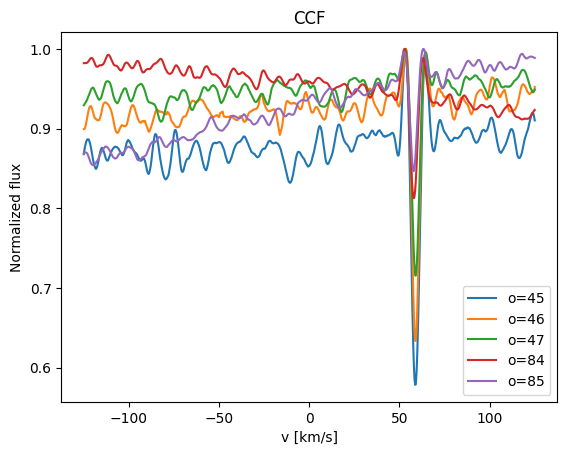

In [49]:
# Lets calculate fast ccfs for well-behaved orders using the crosscorr package
v = np.linspace(-125.,125.,1501)
orders = [55,56,57,94,95,]
ccf = N.calculate_ccf_for_orders(v,orders=orders,plot=True)

# Working with a collection of spectra

In [50]:
import glob

In [51]:
files = glob.glob("../neidspec/data/neid/spectra/*.fits")
HS = neidspec.NEIDSpecList(filelist=files)

In [52]:
HS.df

,OBJECT_ID,filename,exptime,sn55,qprog,rv


In [53]:
HS.sn55

[]

In [54]:
HS.objects

[]

In [55]:
N

NEIDSpec(TIC 239332587,sn55=23.2)